Importing Required Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Load datasets

In [ ]:
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [ ]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_df['label'] = 0
true_df['label'] = 1
df = pd.concat([fake_df, true_df], ignore_index=True)
print(df.shape)
print(df.head())
print(df.label.value_counts())

(44898, 5)
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
label
0    23481
1    21417
Name: count, dtype: int64


In [ ]:
df = df[['title', 'text', 'label']]
print(df.sample(10))

                                                   title  \
42383  Germany's Schaeuble ready to leave Finance Min...   
1084    Airlines Push Back On Trump’s Racist Agenda I...   
7596    Undeterred By Threats Of GOP Obstruction, Oba...   
11638  BOOM! Ivanka’s Line Ranked #1 On Amazon Bestse...   
43383  U.S. judge will not dismiss accused Mexican dr...   
4972    RBG BLASTS Republicans For Crippling The Supr...   
22716  Charlie Manson, Serial Killers, LSD, Hippie Cu...   
11690  PRESIDENT TRUMP’S Illegal Immigrant Crackdown ...   
17572  DEMOCRATS Get DEVASTATING News After Spending ...   
37616  Police find similarities in body parts found C...   

                                                    text  label  
42383  BERLIN (Reuters) - German Finance Minister Wol...      1  
1084   Donald Trump s presidency has given rise to an...      0  
7596   President Obama is clearly not letting GOP thr...      0  
11638  It seems that with each new retail store that ...      0  
43383  NE

In [ ]:
fake_sample = df[df['label'] == 0].sample(5000, random_state=42)
true_sample = df[df['label'] == 1].sample(5000, random_state=42)
df_balanced = pd.concat([fake_sample, true_sample], ignore_index=True)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
print(df_balanced.label.value_counts())

label
1    5000
0    5000
Name: count, dtype: int64


In [ ]:
df_balanced.to_csv('fake_news_balanced.csv', index=False)

Data Preprocessing

In [ ]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = [ps.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

In [ ]:
df_balanced['combined_text'] = df_balanced['title'] + " " + df_balanced['text']
df_balanced['clean_text'] = df_balanced['combined_text'].apply(preprocess_text)
print(df_balanced[['combined_text', 'clean_text']].head())

                                       combined_text  \
0  Clinton weighs making investment income taxabl...   
1   WATCH: Trump Sinks To New Low, Calls Bill Cli...   
2   Arizona GOP Poised To Ban Social Justice Clas...   
3   Ann Coulter Goes Full Racist, Calls Asian Ame...   
4  MICHAEL FLYNN’S LAWYER Releases Statement Scor...   

                                          clean_text  
0  clinton weigh make invest incom taxabl social ...  
1  watch trump sink new low call bill clinton rap...  
2  arizona gop pois ban social justic class event...  
3  ann coulter goe full racist call asian america...  
4  michael flynn lawyer releas statement scorch h...  


In [ ]:
df_balanced.to_csv('fake_news_preprocessed.csv', index=False)

Exploratory Data Analysis

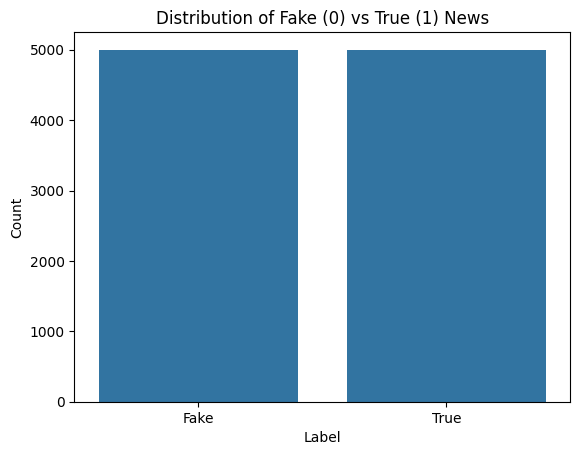

In [ ]:
sns.countplot(x='label', data=df_balanced)
plt.title('Distribution of Fake (0) vs True (1) News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake', 'True'])
plt.show()

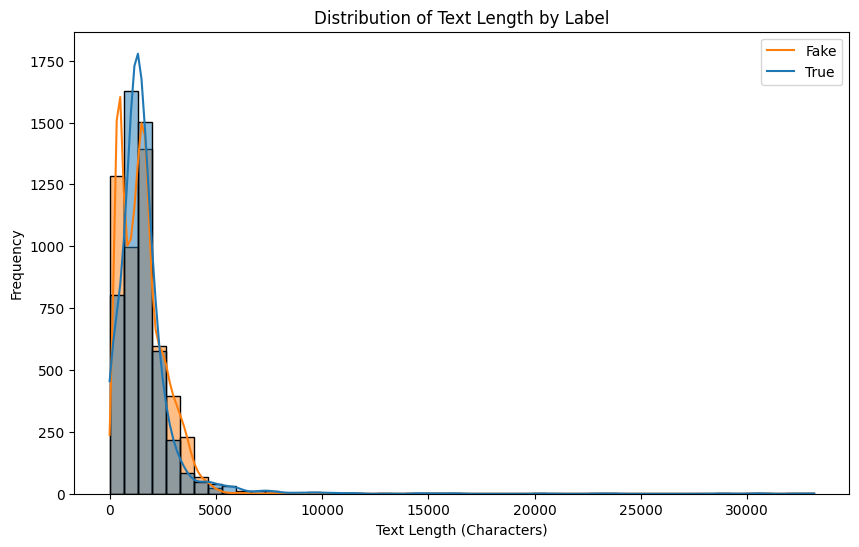

In [ ]:
df_balanced['text_length'] = df_balanced['clean_text'].apply(len)

# Visualize Text Length Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df_balanced, x='text_length', hue='label', bins=50, kde=True)
plt.title('Distribution of Text Length by Label')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Frequency')
plt.legend(['Fake', 'True'])
plt.show()

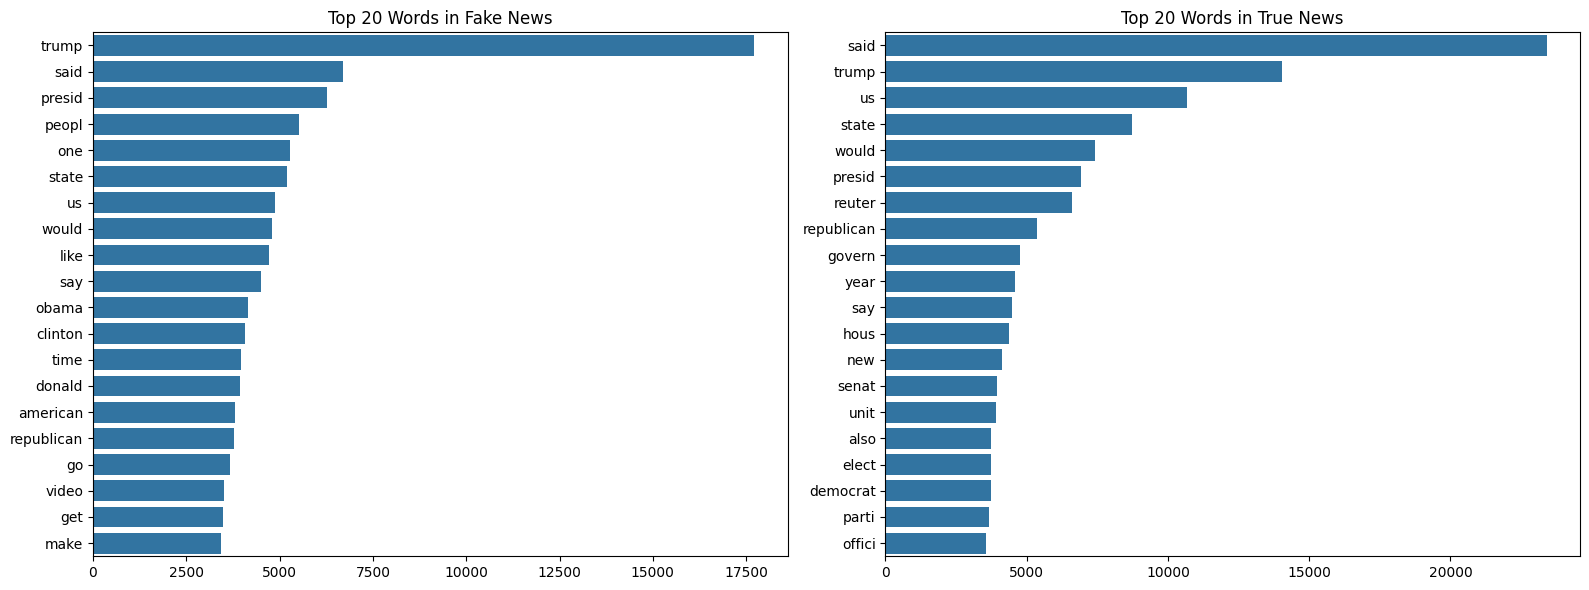

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Separate datasets
fake_news = df_balanced[df_balanced['label'] == 0]['clean_text']
true_news = df_balanced[df_balanced['label'] == 1]['clean_text']

# Top 20 words in Fake News
fake_words = ' '.join(fake_news).split()
fake_counter = Counter(fake_words)
fake_common = fake_counter.most_common(20)

# Top 20 words in True News
true_words = ' '.join(true_news).split()
true_counter = Counter(true_words)
true_common = true_counter.most_common(20)

# Plotting Top words
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=[word[1] for word in fake_common],
            y=[word[0] for word in fake_common], ax=axes[0])
axes[0].set_title('Top 20 Words in Fake News')

sns.barplot(x=[word[1] for word in true_common],
            y=[word[0] for word in true_common], ax=axes[1])
axes[1].set_title('Top 20 Words in True News')

plt.tight_layout()
plt.show()

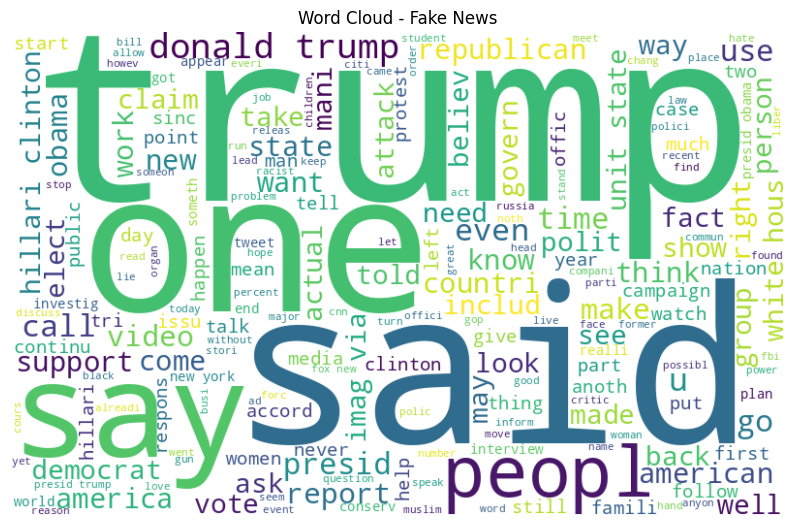

In [ ]:
# Fake News Word Cloud
fake_wc = WordCloud(width=800, height=500, background_color='white').generate(' '.join(fake_news))

plt.figure(figsize=(10,8))
plt.imshow(fake_wc, interpolation='bilinear')
plt.title('Word Cloud - Fake News')
plt.axis('off')
plt.show()

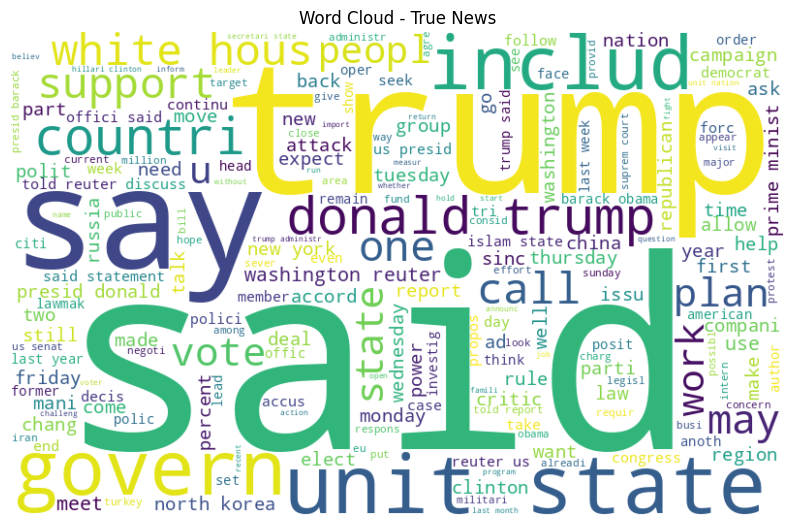

In [ ]:
# True News Word Cloud
true_wc = WordCloud(width=800, height=500, background_color='white').generate(' '.join(true_news))

plt.figure(figsize=(10,8))
plt.imshow(true_wc, interpolation='bilinear')
plt.title('Word Cloud - True News')
plt.axis('off')
plt.show()

Setup and Data preparation

In [ ]:
!pip install transformers tensorflow pandas scikit-learn

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Dropout, Lambda
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('fake_news_preprocessed.csv')
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
df.head()

,title,text,label,combined_text,clean_text
0,Clinton weighs making investment income taxabl...,"Nashua, NEW HAMPSHIRE (Reuters) - U.S. Democra...",1,Clinton weighs making investment income taxabl...,clinton weigh make invest incom taxabl social ...
1,"WATCH: Trump Sinks To New Low, Calls Bill Cli...",Donald Trump took his campaign against Hillary...,0,"WATCH: Trump Sinks To New Low, Calls Bill Cli...",watch trump sink new low call bill clinton rap...
2,Arizona GOP Poised To Ban Social Justice Clas...,"Another day, another assault on the First Amen...",0,Arizona GOP Poised To Ban Social Justice Clas...,arizona gop pois ban social justic class event...
3,"Ann Coulter Goes Full Racist, Calls Asian Ame...","Ann Coulter, throughout her seemingly long car...",0,"Ann Coulter Goes Full Racist, Calls Asian Ame...",ann coulter goe full racist call asian america...
4,MICHAEL FLYNN’S LAWYER Releases Statement Scor...,,0,MICHAEL FLYNN’S LAWYER Releases Statement Scor...,michael flynn lawyer releas statement scorch h...


In [ ]:
max_len = 128
batch_size = 16
epochs = 5

Load tokenizer and model from Hugging Face

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Data Preparation & Tokenization Function

In [ ]:
def encode_texts(texts, max_length):
    # Convert each text to a string to ensure valid input
    text_list = [str(text) for text in texts.tolist()]
    return tokenizer(
        text_list,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='tf'
    )

# Tokenize training and validation texts using the helper function
train_encodings = encode_texts(train_df['clean_text'], max_len)
val_encodings = encode_texts(val_df['clean_text'], max_len)

# Convert labels to tensors
train_labels = tf.convert_to_tensor(train_df['label'].values)
val_labels = tf.convert_to_tensor(val_df['label'].values)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
)).batch(batch_size)

In [ ]:
print("Train Encodings Keys:", train_encodings.keys())
print("Input IDs shape:", train_encodings['input_ids'].shape)
print("Attention Mask shape:", train_encodings['attention_mask'].shape)
print("\nExample Input IDs (first instance):")
print(train_encodings['input_ids'][0].numpy())

print("\nExample Attention Mask (first instance):")
print(train_encodings['attention_mask'][0].numpy())

for batch in train_dataset.take(1):
    batch_inputs, batch_labels = batch

    # batch_inputs is a dictionary with keys: input_ids and attention_mask
    print("\nBatch Inputs Keys:", batch_inputs.keys())
    print("Batch Input IDs shape:", batch_inputs['input_ids'].shape)
    print("Batch Attention Mask shape:", batch_inputs['attention_mask'].shape)

    # Print the first example in the batch for clarity:
    print("\nBatch Example Input IDs (first instance):")
    print(batch_inputs['input_ids'][0].numpy())

    print("\nBatch Example Labels:")
    print(batch_labels.numpy())

Train Encodings Keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
Input IDs shape: (8000, 128)
Attention Mask shape: (8000, 128)

Example Input IDs (first instance):
[  101  8398  2448 12665 17542  2811  9530  7512  3607 15697  8004  3684
  5157  3761 20374  8902 23115 20374 12170 26053 15697  8004  3607  1999
  6767  2140  2615 11322  2343 12260  6593  9530  8159  2072 11703  3593
  2175  6318  6305 27108  2094 22950  8398 14477 16558  2192  2140  3684
  4125 10928 17542  2034  2811  9530  7512  8254  2278  6151  6810  2099
  2615  2663 22950  2056  2343 12260  6593  6221  8398  2695 26029  2279
  3204  3025  5754 23709  2278  2739  9530  7512  2041  4115  2192  2140
  2521 10258  5575  3902  2072  6728  2121  2317  7570  2271 15802  3026
  8398  6671  4584 24456  2361  2933  2191  5754 23709  2278 11703  2215
  2051  1051  9468  6279  2072  6039  5239  2327  4748 25300  3367  2099
  2695 15802  2125 28775  3764  9530 23194   102]

Example Attention Mask (first instan

Building the Hybrid Model(BERT + BiLSTM)

In [ ]:
input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')
bert_inputs = {"input_ids": input_ids, "attention_mask": attention_mask}
def bert_layer_fn(inputs):
    outputs = bert_model(inputs)
    return outputs.last_hidden_state

bert_layer = Lambda(bert_layer_fn, output_shape=(max_len, 768), name="BERT_layer")(bert_inputs)

lstm_out = Bidirectional(LSTM(64, return_sequences=False))(bert_layer)
dropout_layer = Dropout(0.5)(lstm_out)
dense_layer = Dense(64, activation='relu')(dropout_layer)
output = Dense(1, activation='sigmoid')(dense_layer)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ attention_mask      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_ids           │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BERT_layer (Lambda) │ (None, 128, 768)  │          0 │ attention_mask[0… │
│                     │                   │            │ input_ids[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128)       │    426,496 │ BERT_layer[0][0]  │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         65 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 434,817 (1.66 MB)

 Trainable params: 434,817 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[early_stop]
)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 103s 206ms/step - accuracy: 0.9775 - loss: 0.0638 - val_accuracy: 0.9820 - val_loss: 0.0466
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 195ms/step - accuracy: 0.9849 - loss: 0.0477 - val_accuracy: 0.9880 - val_loss: 0.0396
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 195ms/step - accuracy: 0.9909 - loss: 0.0325 - val_accuracy: 0.9885 - val_loss: 0.0384
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 195ms/step - accuracy: 0.9956 - loss: 0.0204 - val_accuracy: 0.9900 - val_loss: 0.0326
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 195ms/step - accuracy: 0.9951 - loss: 0.0172 - val_accuracy: 0.9915 - val_loss: 0.0314


Evaluate model on the validation set

In [ ]:
eval_loss, eval_accuracy = model.evaluate(val_dataset)
print("Evaluation Loss: {:.4f}".format(eval_loss))
print("Evaluation Accuracy: {:.4f}".format(eval_accuracy))

125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - accuracy: 0.9922 - loss: 0.0320
Evaluation Loss: 0.0314
Evaluation Accuracy: 0.9915


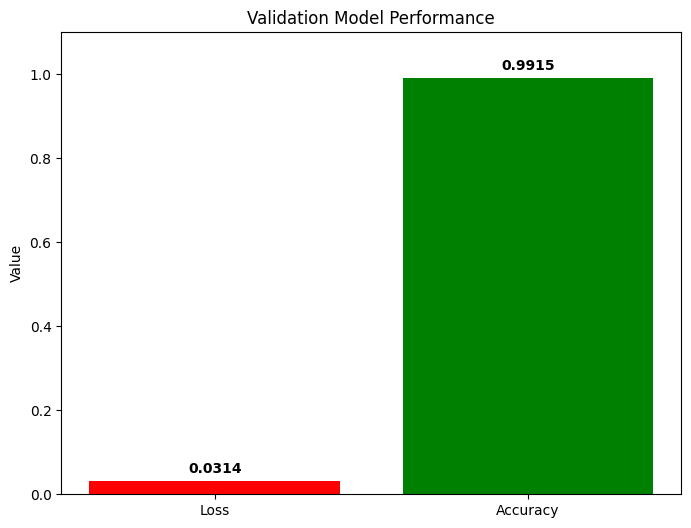

In [ ]:
import matplotlib.pyplot as plt


metrics = ['Loss', 'Accuracy']
values = [eval_loss, eval_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['red', 'green'])
plt.title('Validation Model Performance')
plt.ylabel('Value')
plt.ylim([0, 1.1])

# Add labels to the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', color='black', fontweight='bold')

plt.show()

In [ ]:
sns.set(style="whitegrid", context="talk")

palette = sns.color_palette("viridis", 4)
epochs_range = range(1, len(history.history['accuracy']) + 1)

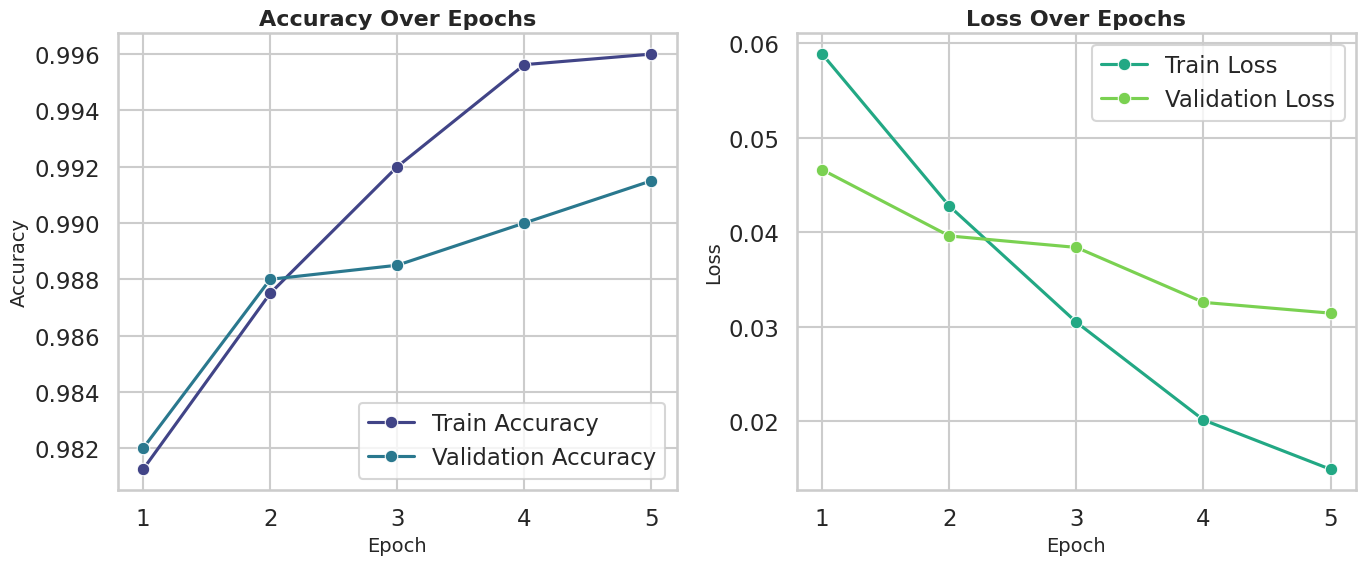

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x=list(epochs_range), y=history.history['accuracy'],
             marker="o", label="Train Accuracy", color=palette[0])
sns.lineplot(x=list(epochs_range), y=history.history['val_accuracy'],
             marker="o", label="Validation Accuracy", color=palette[1])
plt.title("Accuracy Over Epochs", fontsize=16, fontweight="bold")
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(loc="lower right")
plt.xticks(list(epochs_range))

plt.subplot(1, 2, 2)
sns.lineplot(x=list(epochs_range), y=history.history['loss'],
             marker="o", label="Train Loss", color=palette[2])
sns.lineplot(x=list(epochs_range), y=history.history['val_loss'],
             marker="o", label="Validation Loss", color=palette[3])
plt.title("Loss Over Epochs", fontsize=16, fontweight="bold")
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend(loc="upper right")
plt.xticks(list(epochs_range))

plt.tight_layout()
plt.show()

Performance Evaluation

125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 144ms/step
Confusion Matrix:
[[1002   11]
 [   6  981]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1013
           1       0.99      0.99      0.99       987

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



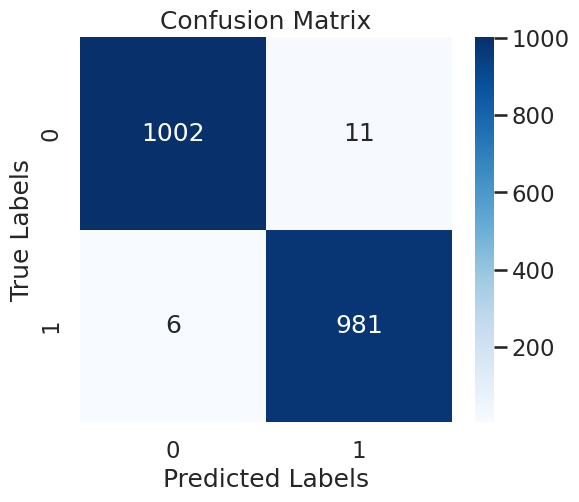

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

predictions = model.predict(val_dataset)

pred_labels = (predictions > 0.5).astype(int)
true_labels = np.concatenate([y for x, y in val_dataset], axis=0)
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:")
print(cm)

report = classification_report(true_labels, pred_labels)
print("Classification Report:\n", report)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Model Save

In [ ]:
model.save('fake_news_classifier.h5')
print("Model saved to 'fake_news_classifier.h5")

Model saved to 'fake_news_classifier.h5


Loading model and testing on unseen data

In [ ]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer

loaded_model = tf.keras.models.load_model(
    "fake_news_classifier.h5",
    custom_objects={
        "bert_layer_fn": bert_layer_fn,
        "TFBertModel": TFBertModel
    }
)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

sample_texts = [
    "President Donald Trump tweeted about his upcoming meeting with world leaders.",
    "The government passed new legislation to improve public healthcare services."
]

max_len = 128
sample_encodings = tokenizer(
    sample_texts,
    padding='max_length',
    truncation=True,
    max_length=max_len,
    return_tensors='tf'
)

In [ ]:
sample_inputs = dict(sample_encodings)

predictions = loaded_model.predict(sample_inputs)
pred_labels = (predictions > 0.5).astype(int)

for i, text in enumerate(sample_texts):
    print(f"Text {i+1}: {text}")
    print(f"Predicted Probability: {predictions[i][0]:.4f}")
    label = "True News" if pred_labels[i][0] == 1 else "Fake News"
    print(f"Predicted Label: {label}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Text 1: President Donald Trump tweeted about his upcoming meeting with world leaders.
Predicted Probability: 0.5229
Predicted Label: True News

Text 2: The government passed new legislation to improve public healthcare services.
Predicted Probability: 0.9069
Predicted Label: True News



In [ ]:
import tensorflow as tf
import transformers
import pandas as pd
import numpy as np

print("TensorFlow version:", tf.__version__)
print("Transformers version:", transformers.__version__)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)

TensorFlow version: 2.18.0
Transformers version: 4.51.3
Pandas version: 2.2.2
NumPy version: 2.0.2


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained("bert-base-uncased")
def bert_layer_fn(inputs):
    outputs = bert_model(inputs)
    return outputs.last_hidden_state
loaded_model = tf.keras.models.load_model(
    "fake_news_classifier.h5",
    custom_objects={"bert_layer_fn": bert_layer_fn, "TFBertModel": TFBertModel},
    compile=False
)
print("Model loaded successfully.")
max_len = 128
header = widgets.HTML(
    "<h1 style='text-align: center; color: #4CAF50;'>Fake News Detector</h1><hr>"
)
instructions = widgets.HTML(
    "<p style='text-align: center;'>This interactive tool uses a hybrid BERT + LSTM model to classify news as <b>Fake</b> or <b>True</b>. Enter your news article text below and click <em>Predict</em>.</p>"
)

text_input = widgets.Textarea(
    value='',
    placeholder='Enter news text here...',
    description='News:',
    layout=widgets.Layout(width='90%', height='150px'),
    style={'description_width': 'initial'}
)

button = widgets.Button(
    description='Predict',
    button_style='primary',
    tooltip='Click to predict',
    icon='check'
)

output = widgets.Output(layout={'border': '1px solid #ddd', 'padding': '10px', 'width': '90%'})

def on_button_clicked(b):
    with output:
        clear_output()
        user_text = text_input.value
        if not user_text.strip():
            print("Please enter some text.")
        else:
            sample_encodings = tokenizer(
                [user_text],
                padding="max_length",
                truncation=True,
                max_length=max_len,
                return_tensors="tf"
            )
            sample_inputs = dict(sample_encodings)
            prediction = loaded_model.predict(sample_inputs)
            pred_prob = prediction[0][0]
            label = "True News" if pred_prob > 0.5 else "Fake News"

            print("Input:")
            print(user_text)
            print("\nPrediction:")
            print(f"Predicted Probability: {pred_prob:.4f}")
            print(f"Predicted Label: {label}")

button.on_click(on_button_clicked)

ui = widgets.VBox([header, instructions, text_input, button, output])
display(ui)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model loaded successfully.


Telegram Bot

In [ ]:
!pip install python-telegram-bot tensorflow transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 673.5/673.5 kB 41.1 MB/s eta 0:00:00


In [ ]:
import logging
import nest_asyncio
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from telegram import Update
from telegram.ext import ApplicationBuilder, CommandHandler, MessageHandler, filters, ContextTypes

nest_asyncio.apply()

logging.basicConfig(
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    level=logging.INFO
)
logger = logging.getLogger(__name__)
def bert_layer_fn(inputs):
    outputs = bert_model(inputs)
    return outputs.last_hidden_state

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

model = tf.keras.models.load_model(
    "fake_news_classifier.h5",
    custom_objects={"bert_layer_fn": bert_layer_fn, "TFBertModel": TFBertModel},
    compile=False
)
logger.info("Model loaded successfully.")
max_len = 128

async def start(update: Update, context: ContextTypes.DEFAULT_TYPE):
    welcome_message = (
        "Welcome to the Fake News Detector Bot!\n\n"
        "Send me a piece of news text and I'll predict whether it's <b>True</b> or <b>Fake</b>."
    )
    await update.message.reply_text(welcome_message, parse_mode="HTML")

async def about(update: Update, context: ContextTypes.DEFAULT_TYPE):
    about_message = (
        "<b>About This Model:</b>\n\n"
        "This is a hybrid BERT + BiLSTM model that leverages a pre-trained BERT model "
        "to extract rich contextual features from text, and processes these features through an LSTM layer "
        "to capture sequential patterns. The final dense layers produce a probability that classifies the news as <b>True</b> or <b>Fake</b>."
    )
    await update.message.reply_text(about_message, parse_mode="HTML")

async def applications(update: Update, context: ContextTypes.DEFAULT_TYPE):
    applications_message = (
        "<b>Applications & Use Cases:</b>\n\n"
        "• Real-time monitoring of social media news feeds\n"
        "• Content moderation for media platforms\n"
        "• Assisting fact-checking organizations\n"
        "• Filtering misinformation during elections or public crises\n"
        "• Supporting academic research on disinformation"
    )
    await update.message.reply_text(applications_message, parse_mode="HTML")

async def predict_text(update: Update, context: ContextTypes.DEFAULT_TYPE):
    user_text = update.message.text.strip()
    if not user_text:
        await update.message.reply_text("Please send some text to analyze.")
        return

    sample_encodings = tokenizer(
        [user_text],
        padding="max_length",
        truncation=True,
        max_length=max_len,
        return_tensors="tf"
    )
    sample_inputs = dict(sample_encodings)

    prediction = model.predict(sample_inputs)
    pred_prob = prediction[0][0]
    label = "True News" if pred_prob > 0.5 else "Fake News"
    response = f"Predicted Probability: {pred_prob:.4f}\nPredicted Label: {label}"
    await update.message.reply_text(response)

def main():
    token = "7639261442:AAF3Mv9-EH1eitKpk2C1N0Srt-vBBFKRfVo"
    application = ApplicationBuilder().token(token).build()

    application.add_handler(CommandHandler("start", start))
    application.add_handler(CommandHandler("about", about))
    application.add_handler(CommandHandler("applications", applications))
    application.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, predict_text))

    logger.info("Bot started. Listening for messages...")
    application.run_polling()

if __name__ == '__main__':
    main()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


RuntimeError: Cannot close a running event loop